## 1. Load the data 

In [1]:
# %%bash
# pip install pandas

In [2]:
# Import statements
import pandas as pd 
import os

In [3]:
pwd = "/Users/ayush/work/Zemanta-Data-Science-Summer-School"
os.chdir(pwd)

In [4]:
# Read the training data in pandas dataframe
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
df_train = pd.read_csv("data/workshop_train.csv")

In [5]:
# Let's have a look at the dataset
df_train.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,10633_1,0,I watched this video at a friend's house. I'm ...
2,319_1,0,"A friend of mine bought this film for £1, and ..."
3,6811_10,1,Although I generally do not like remakes belie...
4,7369_1,0,"I had a feeling that after \Submerged\"", this ..."


In [6]:
df_train.shape

(12617, 3)

In [7]:
df_train.columns

Index([u'id', u'sentiment', u'review'], dtype='object')

In [8]:
df_train = df_train[['sentiment','review']]

In [9]:
df_train.columns

Index([u'sentiment', u'review'], dtype='object')

In [10]:
df_train.head()

,sentiment,review
0,1,With all this stuff going down at the moment w...
1,0,I watched this video at a friend's house. I'm ...
2,0,"A friend of mine bought this film for £1, and ..."
3,1,Although I generally do not like remakes belie...
4,0,"I had a feeling that after \Submerged\"", this ..."


In [11]:
# Let's have a look at the reviews
df_train.review.values[1]

"I watched this video at a friend's house. I'm glad I did not waste money buying this one. The video cover has a scene from the 1975 movie Capricorn One. The movie starts out with several clips of rocket blow-ups, most not related to manned flight. Sibrel's smoking gun is a short video clip of the astronauts preparing a video broadcast. He edits in his own voice-over instead of letting us listen to what the crew had to say. The video curiously ends with a showing of the Zapruder film. His claims about radiation, shielding, star photography, and others lead me to believe is he extremely ignorant or has some sort of ax to grind against NASA, the astronauts, or American in general. His science is bad, and so is this video."

In [12]:
# Distribution of the examples
pd.value_counts(df_train.sentiment)

0    6331
1    6286
Name: sentiment, dtype: int64

## 2. Data Preprocessing & Visualization

In [13]:
# %%bash
# pip install BeautifulSoup4
# pip install -U nltk

In [14]:
from bs4 import BeautifulSoup 
# The package comes built-in with Python
import re
# http://www.nltk.org/install.html
import nltk 

In [15]:
# Download text data sets, including stop words
# nltk.download()

In [16]:
from nltk.corpus import stopwords # Import the stop word list
stops = set(stopwords.words("english"))

In [17]:
# Pre-processing step
def text_to_words(raw_text):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_text).get_text() 

    # 2. Remove non-letters
    # Find anything that is NOT a lowercase letter (a-z) or an upper case letter (A-Z), and replace it with a space
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    # stops = set(stopwords.words("english"))
    
    # There are many other things we could do to the data
    # For example, Porter Stemming and Lemmatizing (both available in NLTK) 
    # would allow us to treat "messages", "message", and "messaging" as the same word
    # which could certainly be useful.
    
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    clear_text = " ".join(meaningful_words)
    return clear_text
    #validate_text_sentiment["Message"][i] = clear_text 
    #print i
    #return( " ".join( meaningful_words ))  

In [18]:
# Use the apply function in pandas to apply the function
# axis = 1 specifier means that the application is done at a row than a column level
df_train['cleaned_text'] = df_train.apply (lambda row: text_to_words(row.review), axis=1)

/Users/ayush/anaconda2/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /Users/ayush/anaconda2/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [19]:
df_train.head()

,sentiment,review,cleaned_text
0,1,With all this stuff going down at the moment w...,stuff going moment mj started listening music ...
1,0,I watched this video at a friend's house. I'm ...,watched video friend house glad waste money bu...
2,0,"A friend of mine bought this film for £1, and ...",friend mine bought film even grossly overprice...
3,1,Although I generally do not like remakes belie...,although generally like remakes believing rema...
4,0,"I had a feeling that after \Submerged\"", this ...",feeling submerged one better right must lookin...


In [20]:
df_train.to_csv("data/cleaned_train.csv",index=False)

## Visualization

In [21]:
# %%bash
# pip install wordcloud 

In [22]:
# conda install -c conda-forge wordcloud
# http://amueller.github.io/word_cloud/index.html
from wordcloud import WordCloud,STOPWORDS
# Import plotting library
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Word cloud for positive words


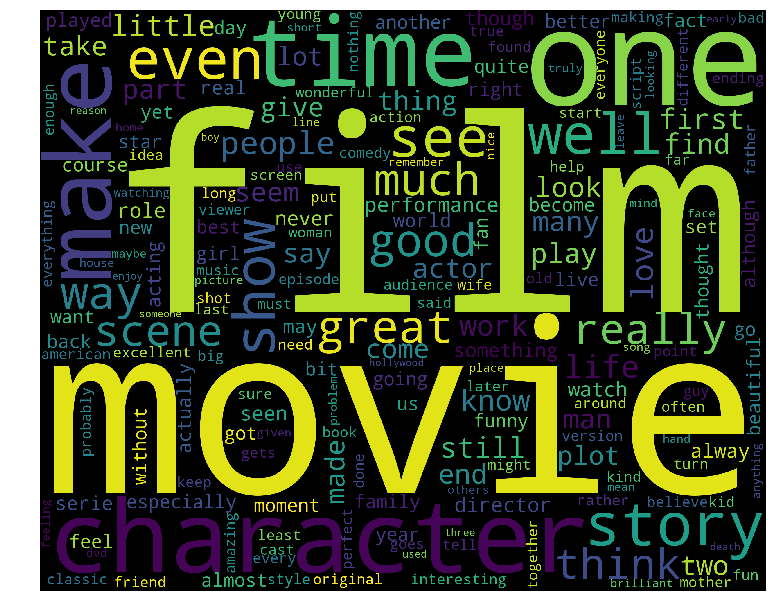

In [29]:
print "Word cloud for positive words"
wordcloud_draw(df_train[(df_train.sentiment==1)]['cleaned_text'])

Word cloud for negative words


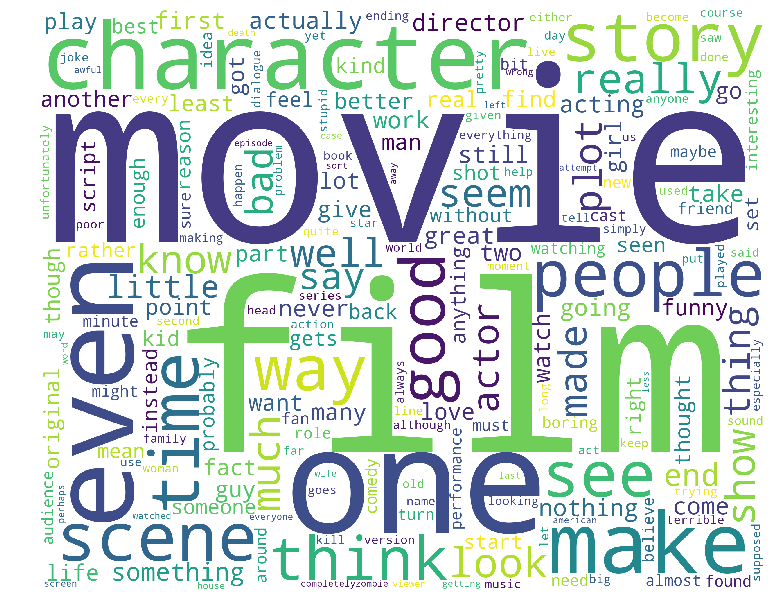

In [24]:
print "Word cloud for negative words"
wordcloud_draw(df_train[(df_train.sentiment==0)]['cleaned_text'], color = 'white')

## 3. Text Vectorization

In [25]:
# CountVectorizer is scikit-learn's bag of words tool
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# analyzer = "word" specifies that the feature should be made of word
# To limit the size of the feature vectors, we should choose some maximum vocabulary size. 
# Below, we use the 5000 most frequent words.
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, 
                             max_features = 5000) 

In [27]:
# fit_transform() does two functions: First, it fits the model and learns the vocabulary; 
# second, it transforms our training data into feature vectors. 
# The input to fit_transform should be a list of strings.
train_data_features = vectorizer.fit_transform(df_train['cleaned_text'].values.astype('U'))

In [28]:
# The result of the above operation is a sparse matrix
train_data_features

<12617x5000 sparse matrix of type '<type 'numpy.int64'>'
	with 998018 stored elements in Compressed Sparse Row format>

In [29]:
print train_data_features.shape

(12617, 5000)


In [30]:
# Numpy arrays are easy to work with, so convert the result to an array
train_data_features = train_data_features.toarray()

In [31]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
print vocab[0:10]

[u'abandoned', u'abc', u'abilities', u'ability', u'able', u'abraham', u'abrupt', u'absence', u'absolute', u'absolutely']


In [32]:
# We can also print the counts of each word in the vocabulary
import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)
print dist

[ 97  53  58 ... 412 281  69]


In [33]:
# For each, print the vocabulary word and the number of times it appears in the training set
# for tag, count in zip(vocab, dist):
#     print count, tag

In [34]:
print train_data_features[0]

[0 0 0 ... 0 0 0]


In [35]:
reverse_vocab = {v: k for k, v in vectorizer.vocabulary_.iteritems()}
# print reverse_vocab

In [36]:
# # Convert vectors to text
# text = ''
# for i in range(0, len(vec)):
#     if vec[i] != 0:
#         text = text + ' ' + reverse_vocab.get(i)
# print text

In [37]:
# vec = vectorizer.transform([df_train['cleaned_text'][0]]).toarray()
# # print df_train['cleaned_text'][0]

### Different techniques for Text Vectoriation

### Bigram Model

In [38]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b', min_df=1)
analyze = bigram_vectorizer.build_analyzer()
analyze('Bi-grams are cool!') == (['bi', 'grams', 'are', 'cool', 'bi grams', 'grams are', 'are cool'])

True

### TfidfVectorizer

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
# tfidf = transformer.fit_transform(df_train['cleaned_text'].values.astype('U'))

# 5. Apply Machine Learning Algorithms

## [Naive Bayes](http://scikit-learn.org/stable/modules/naive_bayes.html)

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
y_actual = df_train.sentiment.values

In [42]:
nb_model = GaussianNB().fit(train_data_features, y_actual)

In [44]:
# nb_model.predict(?)

In [45]:
df_test = pd.read_csv("data/workshop_train.csv")

In [46]:
df_test['cleaned_text'] = df_test.apply (lambda row: text_to_words(row.review), axis=1)
test_data_features = vectorizer.transform(df_test['cleaned_text'].values.astype('U'))
test_data_features = test_data_features.toarray()

In [47]:
predictions = nb_model.predict(test_data_features)

In [48]:
print predictions[0:10]

[0 0 0 1 0 0 0 0 1 1]


In [49]:
df_test['nb_prediction'] = predictions

In [64]:
# df_test.to_csv("results/test_prediction.csv", index=False)

# Performance Metrics

## Accuracy

In [50]:
from sklearn.metrics import accuracy_score
y_pred = nb_model.predict(train_data_features)
y_true = df_train['sentiment']

In [51]:
print 'Accuracy of the algorithm is %f' %(accuracy_score(y_true, y_pred))

Accuracy of the algorithm is 0.778553


## Precision

In [52]:
from sklearn.metrics import precision_score
print 'Precison of the algorithm is %f' %(precision_score(y_true, y_pred))

Precison of the algorithm is 0.877269


## Recall

In [53]:
from sklearn.metrics import recall_score
print 'Recall of the algorithm is %f' %(recall_score(y_true, y_pred))

Recall of the algorithm is 0.645880


## F1-score

In [54]:
from sklearn.metrics import f1_score
print 'F1-score of the algorithm is %f' %(f1_score(y_true, y_pred))

F1-score of the algorithm is 0.743999


## Classification Report

In [55]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          0       0.72      0.91      0.80      6331
          1       0.88      0.65      0.74      6286

avg / total       0.80      0.78      0.77     12617



## Confusion Matrix

In [56]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print tn, fp, fn, tp

5763 568 2226 4060


## 6. Cross-Validation & Hyperparameter Tuning

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
# Random Forest classifier with 10 trees
forest = RandomForestClassifier(n_estimators = 10)

In [59]:
# 10-fold Cross-Validation using Grid Search 
from sklearn.cross_validation import cross_val_score
from sklearn import metrics

/Users/ayush/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [60]:
# scoring = ['precision_macro', 'recall_macro', 'f1_macro']
param_grid = {'n_estimators': [10, 5]}

In [61]:
from sklearn.grid_search import GridSearchCV
grid_clf = GridSearchCV(forest, param_grid, cv=3, scoring='precision_macro')

/Users/ayush/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [62]:
grid_clf.fit(train_data_features, df_train['sentiment'].values)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 5]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='precision_macro', verbose=0)

In [63]:
# Get the best model
best_model = grid_clf.best_estimator_

In [64]:
# Get the value of the hyperparameters for best model
print grid_clf.best_params_

{'n_estimators': 10}


In [65]:
grid_clf = GridSearchCV(forest, param_grid, cv=10, scoring='precision_macro', n_jobs = -1)
grid_clf.fit(train_data_features, df_train['sentiment'].values)
best_model = grid_clf.best_estimator_

In [66]:
predictions = best_model.predict(test_data_features)

In [67]:
df_test['rf_prediction'] = predictions

In [68]:
# df_test.to_csv("results/test_prediction.csv", index=False)

## Model Ensembles

In [69]:
from sklearn import svm
from sklearn.ensemble import BaggingClassifier

In [70]:
# https://en.wikipedia.org/wiki/Radial_basis_function_kernel
svm_rbf = svm.SVC(C = 1, gamma = 0.001, kernel='rbf')

In [71]:
n_estimators = 10
svm_rbf_ensemble = BaggingClassifier(svm_rbf, max_samples=1.0 / n_estimators, 
                            n_estimators=n_estimators)

In [72]:
model = svm_rbf_ensemble.fit(train_data_features, df_train["sentiment"])

In [73]:
predictions = model.predict(test_data_features)

In [74]:
df_test['svm_ensemble_prediction'] = predictions

In [75]:
# df_test.to_csv("results/test_prediction.csv", index=False)